In [1]:
import brandclass

In [2]:
#csvの読み込みとBRANDインスタンスの生成
BRAND=brandclass.brand('brands.csv')

7653


In [3]:
#csvの読み込みとTAGSインスタンスの生成
TAGS=brandclass.brand('tags.csv')

30295


In [4]:
#nctm.pyファイルからNCTM関数をインポート
from nctm import NCTM
# モデル定義
W=BRAND.W
X=TAGS.W
Vw = len(BRAND.W)
Vx = len(TAGS.W)
K = 100
alpha = 0.1
beta= 0.1
gamma= 0.1
eta = 1.0
max_iter = 10000
nctm = NCTM(K=K, alpha=alpha, beta=beta, gamma=gamma, eta=eta, max_iter=max_iter)

In [5]:
#####必ずXとWの長さが等しいことを確認######
print(len(X))
print(len(W))

100001
100001


In [ ]:
# NCTM のフィッティングと時間計測
import time
start = time.time()
nctm.fit(W,X,Vw,Vx)
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

The installed widget Javascript is the wrong version.


In [8]:
#単語とトピックの関連付け
brand_topic=BRAND.brand_to_topic(nctm.Z)
tag_topic=TAGS.brand_to_topic(nctm.Y)

In [9]:
#topicごとにブランドとトピックの組をまとめる
brand_topic_list=BRAND.brand_topic_list_f(brand_topic,K)
tag_topic_list=TAGS.brand_topic_list_f(tag_topic,K)

In [15]:
#トピックごとに出現ブランドのセットを作る
t_setlist_brand=BRAND.t_setlist_brand_f(brand_topic_list,K)
t_setlist_tag=TAGS.t_setlist_brand_f(tag_topic_list,K)

In [43]:
TopicBrandSize=[]
TopicTagSize=[]
index=[]
for i in range(len(t_setlist_brand)):
    TopicBrandSize.append(len(t_setlist_brand[i]))
    TopicTagSize.append(len(t_setlist_tag[i]))
    index.append(i)

In [44]:
print(TopicBrandSize)

[342, 385, 320, 328, 305, 337, 301, 502, 313, 370, 295, 306, 317, 308, 308, 392, 366, 391, 330, 291, 298, 289, 347, 398, 364, 301, 304, 319, 331, 333, 316, 327, 360, 303, 369, 300, 326, 319, 297, 348, 311, 310, 311, 319, 330, 316, 370, 355, 336, 355, 327, 452, 311, 306, 321, 507, 379, 407, 373, 410, 314, 329, 275, 321, 318, 337, 282, 462, 312, 311, 334, 394, 310, 350, 332, 336, 352, 333, 335, 308, 346, 324, 323, 348, 307, 300, 317, 330, 329, 339, 310, 262, 405, 322, 287, 322, 326, 323, 313, 330]


/home/inouelab/anaconda3/envs/zukako/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


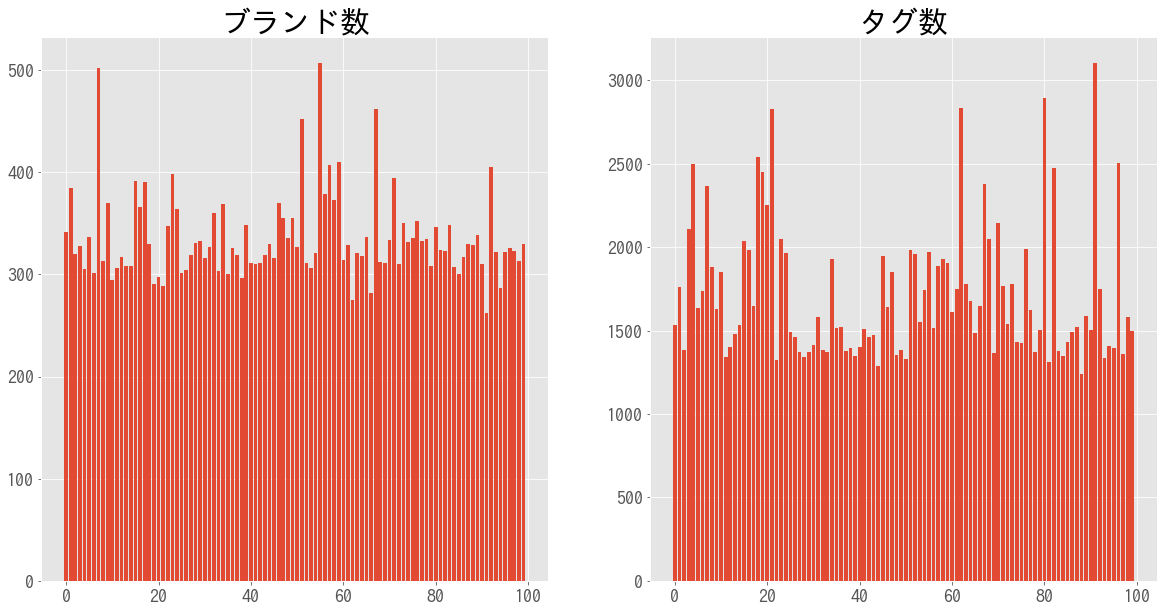

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'TakaoGothic'}
matplotlib.rc('font', **font)


plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.legend(fontsize=18)
plt.tick_params(labelsize=18)
plt.title(u'ブランド数',fontsize = 30)
plt.bar(index,TopicBrandSize,align='center')
plt.subplot(1, 2, 2)
plt.legend(fontsize=18)
plt.tick_params(labelsize=18)
plt.title(u'タグ数',fontsize = 30)
plt.bar(index,TopicTagSize,align='center')
# plt.show()
plt.savefig('image.png')

In [11]:
#セットを用いて出現回数をカウント
count_topic_brand=BRAND.count_topic_f(brand_topic_list,t_setlist_brand,K)
count_topic_tag=TAGS.count_topic_f(tag_topic_list,t_setlist_tag,K)

In [ ]:
### 書き出し前に必ずCheckpointの保存&保存先に同名ファイルがないか確認

In [13]:
#トピックごとに多い順にソートしてresultファイルの書き出しを行う
BRAND.write_result(t_setlist_brand,count_topic_brand)
TAGS.write_result(t_setlist_tag,count_topic_tag)

END
END


In [66]:
nctm.R

[array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0]),
 array([0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0, 0

In [67]:
nctm.Y

[array([64, 86, 78, 76, 64]),
 array([47, 35, 47, 13, 60, 18, 18, 73, 69, 47]),
 array([17,  3, 17, 45, 82, 73, 96, 17, 96]),
 array([85, 85,  8, 93, 85, 68, 85, 85, 68,  8]),
 array([75, 75, 58, 51, 28, 49, 42, 28, 42]),
 array([17, 17, 17, 19, 19, 17, 17, 17, 27, 17]),
 array([13, 85, 28, 85, 68, 28, 45]),
 array([62, 28,  4, 90, 28, 35, 35, 28, 16,  6]),
 array([13, 44, 99, 96, 44, 50, 99,  3, 99]),
 array([62, 57, 30, 62, 62, 62]),
 array([ 4, 90, 90,  4,  4, 90, 90,  4,  4, 15]),
 array([41, 18, 41, 70, 39, 41]),
 array([11]),
 array([80, 25,  2, 29, 25, 55, 87, 25]),
 array([38, 12, 28, 54, 97, 76]),
 array([17, 17, 90, 90, 17]),
 array([ 5, 19,  5, 23, 23, 19, 14]),
 array([11]),
 array([36, 16, 16, 14, 45, 31, 36, 11]),
 array([45, 45, 11, 11, 25, 34, 45, 11, 11, 55]),
 array([62, 15, 33,  4, 62, 45, 33, 62, 33, 45]),
 array([52, 57, 52, 52, 57, 57, 96, 96, 57, 57]),
 array([67, 67, 94, 94]),
 array([77, 77,  9, 38, 61, 38]),
 array([51, 32, 32, 32, 32]),
 array([40, 77, 77, 77

In [86]:
noise_list=[]
for r,tag in zip(nctm.R,X):
    for r0, tag0 in zip(r,tag) :
        if(r0==0):
            noise_list.append(tag0)

In [87]:
noise_list

[8071,
 549,
 2870,
 10725,
 30268,
 549,
 23145,
 14491,
 21144,
 11401,
 23540,
 29168,
 6580,
 708,
 4405,
 21251,
 10081,
 1065,
 6459,
 7944,
 2600,
 21409,
 708,
 28979,
 4405,
 6635,
 19337,
 20592,
 24465,
 25501,
 1065,
 3778,
 15591,
 3130,
 11902,
 15846,
 20676,
 23394,
 21138,
 12499,
 17580,
 29727,
 29727,
 9452,
 16199,
 24960,
 28455,
 3500,
 39,
 19831,
 12479,
 13604,
 23367,
 6728,
 12194,
 7927,
 23804,
 14613,
 391,
 3939,
 13667,
 13330,
 22718,
 28817,
 5455,
 4291,
 29727,
 6459,
 26356,
 10740,
 28303,
 22826,
 7180,
 5378,
 19539,
 2455,
 22436,
 4405,
 549,
 8169,
 13855,
 5364,
 27338,
 18485,
 549,
 16375,
 21793,
 391,
 17616,
 4003,
 23692,
 20191,
 28831,
 14980,
 29727,
 255,
 28979,
 10018,
 22950,
 9240,
 549,
 22730,
 4405,
 29727,
 25590,
 5378,
 9452,
 8758,
 24668,
 7729,
 26039,
 5589,
 18184,
 6377,
 1879,
 549,
 27597,
 15393,
 24670,
 10054,
 4405,
 29727,
 24336,
 26234,
 21909,
 3939,
 8604,
 549,
 4582,
 17899,
 8021,
 8952,
 14194,
 24465

In [100]:
import numpy as np
tag_ = TAGS.brand_dict.items()
a=set(noise_list)
# print(a)
# aa=list(a)
noise_=[]
# count_noise=np.zeros(len(TAGS.brandset))
for i in  a:
    for t in list_:
        if(t[1]==i):
#             count_noise[TAGS.brandset.index(t[0])]+=1
            noise_.append(t[0])
# print(noise_)

In [101]:
import pandas as pd
df = pd.DataFrame(columns=['tag'])
df['tag']=noise_[0:200]

df.to_csv('noise.csv',encoding="utf8")

In [81]:
print(count_noise)

[ 89.  18.  23. ...,   0.   0.   0.]


In [ ]:
for i in range(1000):
    if TAGS.brandset[i].

In [93]:
TAGS.brand_dict.items()

dict_items([('ダサい', 0), ('', 1), ('山内', 15163), ('人魚', 15164), ('あーーーーー😭😭', 15832), ('PRADA', 2), ('ソックダート', 9603), ('赤いスカート', 3), ('ランチジャケット', 15166), ('armaniexchange', 4), ('全身レイヤード', 22646), ('クリスマス近い', 5), ('ちゃいろ', 15168), ('彼女ほしい', 15171), ('YAB-YUM', 15170), ('hijab', 6), ('ナイキエアマックス', 15172), ('mer', 27901), ('卍', 15174), ('LVC', 15175), ('スエパン', 7), ('《予約》【WEB限定色】T/Cグログランショートマウンテンパーカー', 9), ('air jordan 1', 10), ('勝手に借りる', 15176), ('部屋が汚ない', 15165), ('パンツめちゃ暖かくて最高', 11), ('ビューラブズ', 12), ('code', 13), ('マウントレイニアデザイン', 14), ('yukifujisawa', 15181), ('ジャケット×スウェパン', 15), ('クリップオンサングラス', 15182), (' RING JACKET', 15183), ('stadium jacket', 15184), ('royalflash梅田', 16), ('coenでキレイめスタイル', 17), ('SEVENTEEN (K-POP)', 15167), ('ネイビーブーツ', 18), ('おかん', 19), ('ビビッドカラー', 15185), ('AZUL', 20), ('ブージュルード', 15186), ('北海道寒い', 27870), (' Christmas', 15187), ('上下青', 15188), ('aboutalook', 21), ('WIRED', 22), ('ワンピース水着', 15190), ('チェックニット', 23), ('m-cro', 15191), ('デイジー', 15192), ('ノックアバウト', 24), (